In [1]:
import pandas as pd
import numpy as np

from keras import applications
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt

from sklearn.datasets import load_files

Using TensorFlow backend.


In [2]:
# Tundub kasulik
# https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c

In [3]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

train_dir = '../mergedData/'
x_train, y_train, target_labels = load_dataset(train_dir)

# load_dataset annab formaadi
print(x_train[0], '<-!->', y_train[0], '<-!->', target_labels[y_train[0]])

../mergedData/Grape/r_242_100.jpg48 <-!-> 21 <-!-> Grape


Näited sama palju kui klasse: 67


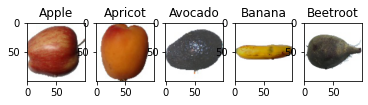

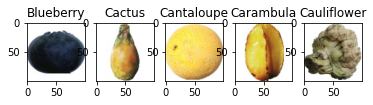

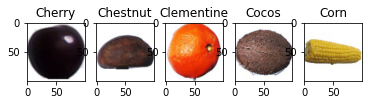

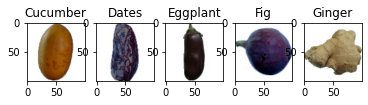

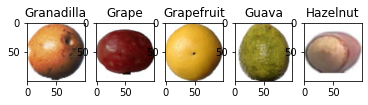

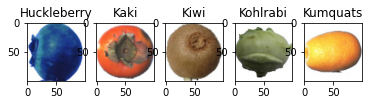

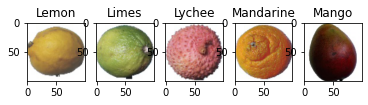

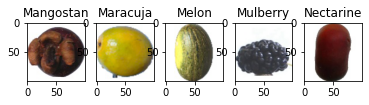

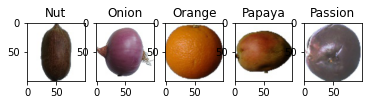

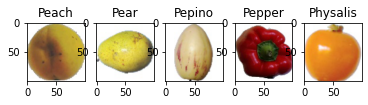

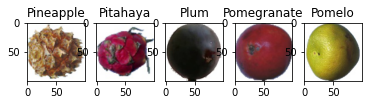

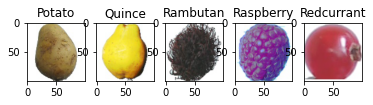

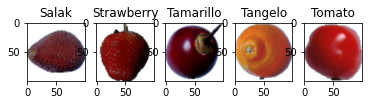

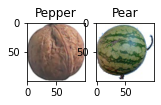

In [4]:
# Annab iga erineva fruiti kohta ühe näite
label_index, indices = np.unique(y_train, return_index=True)
print("Näited sama palju kui klasse: " + str(len(label_index)))

# Suuremaid pilte näidata ei suuda
for i in range(0, 66, 5):
    if i == 65:
        for j in range(0, 2, 1):
            plt.subplot(1,5,j+1)
            plt.imshow(load_img(x_train[indices[i+j]]))
            plt.title(target_labels[label_index[y_train[i+j]]])
    else:
        for j in range(0, 5, 1):
            plt.subplot(1,5,j+1)
            plt.imshow(load_img(x_train[indices[i+j]]))
            plt.title(target_labels[label_index[i+j]])
    plt.show()

In [5]:
# Ilmselt on mudeli jaoks lihtsam kasutada ImageDataGeneratorit:
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [6]:
gen = test_datagen.flow_from_directory(directory=train_dir, batch_size=1, 
                                        shuffle='true', seed=1, class_mode='categorical')
labels = gen.class_indices
print(labels)

Found 39513 images belonging to 67 classes.
{'Apple': 0, 'Apricot': 1, 'Avocado': 2, 'Banana': 3, 'Beetroot': 4, 'Blueberry': 5, 'Cactus': 6, 'Cantaloupe': 7, 'Carambula': 8, 'Cauliflower': 9, 'Cherry': 10, 'Chestnut': 11, 'Clementine': 12, 'Cocos': 13, 'Corn': 14, 'Cucumber': 15, 'Dates': 16, 'Eggplant': 17, 'Fig': 18, 'Ginger': 19, 'Granadilla': 20, 'Grape': 21, 'Grapefruit': 22, 'Guava': 23, 'Hazelnut': 24, 'Huckleberry': 25, 'Kaki': 26, 'Kiwi': 27, 'Kohlrabi': 28, 'Kumquats': 29, 'Lemon': 30, 'Limes': 31, 'Lychee': 32, 'Mandarine': 33, 'Mango': 34, 'Mangostan': 35, 'Maracuja': 36, 'Melon': 37, 'Mulberry': 38, 'Nectarine': 39, 'Nut': 40, 'Onion': 41, 'Orange': 42, 'Papaya': 43, 'Passion': 44, 'Peach': 45, 'Pear': 46, 'Pepino': 47, 'Pepper': 48, 'Physalis': 49, 'Pineapple': 50, 'Pitahaya': 51, 'Plum': 52, 'Pomegranate': 53, 'Pomelo': 54, 'Potato': 55, 'Quince': 56, 'Rambutan': 57, 'Raspberry': 58, 'Redcurrant': 59, 'Salak': 60, 'Strawberry': 61, 'Tamarillo': 62, 'Tangelo': 63, 'Tomat

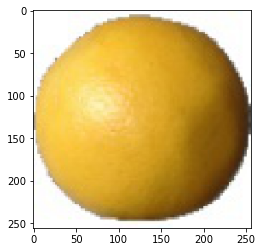

In [7]:
# x on pilt ja y on label onehot kujul
x, y = gen.next()

plt.imshow(x[0])